# Logistic Regression, (Poisson regression on Goals) Power Ranking

## David Sheehan Poisson regression

https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.sm_exceptions as sm_exceptions
from patsy import dmatrix, dmatrices

In [2]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl_1617 = epl_1617.rename(columns={'HomeTeam': 'h', 'AwayTeam': 'a','FTHG': 'h_ftGoals', 'FTAG': 'a_ftGoals'})
epl_1617.head()

,h,a,h_ftGoals,a_ftGoals
0,Burnley,Swansea,0,1
1,Crystal Palace,West Brom,0,1
2,Everton,Tottenham,1,1
3,Hull,Leicester,2,1
4,Man City,Sunderland,2,1


In [3]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()


h_ftGoals    1.591892
a_ftGoals    1.183784
dtype: float64

In [4]:
epl_1617.head()

,h,a,h_ftGoals,a_ftGoals
0,Burnley,Swansea,0,1
1,Crystal Palace,West Brom,0,1
2,Everton,Tottenham,1,1
3,Hull,Leicester,2,1
4,Man City,Sunderland,2,1


In [5]:
epl_1617.tail()

,h,a,h_ftGoals,a_ftGoals
365,Chelsea,Watford,4,3
366,Arsenal,Sunderland,2,0
367,Man City,West Brom,3,1
368,Southampton,Man United,0,0
369,Leicester,Tottenham,1,6


In [6]:
epl_1617.shape

(370, 4)

In [7]:
goal_model_data = pd.concat([epl_1617[['h','a','h_ftGoals']].assign(home=1).rename(
            columns={'h':'team', 'a':'opponent','h_ftGoals':'goals'}),
           epl_1617[['a','h','a_ftGoals']].assign(home=0).rename(
            columns={'a':'team', 'h':'opponent','a_ftGoals':'goals'})])
goal_model_data.head()

,team,opponent,goals,home
0,Burnley,Swansea,0,1
1,Crystal Palace,West Brom,0,1
2,Everton,Tottenham,1,1
3,Hull,Leicester,2,1
4,Man City,Sunderland,2,1


In [8]:
goal_model_data.iloc[365:374]

,team,opponent,goals,home
365,Chelsea,Watford,4,1
366,Arsenal,Sunderland,2,1
367,Man City,West Brom,3,1
368,Southampton,Man United,0,1
369,Leicester,Tottenham,1,1
0,Swansea,Burnley,1,0
1,West Brom,Crystal Palace,1,0
2,Tottenham,Everton,1,0
3,Leicester,Hull,1,0


In [9]:
goal_model_data.tail()

,team,opponent,goals,home
365,Watford,Chelsea,3,0
366,Sunderland,Arsenal,0,0
367,West Brom,Man City,1,0
368,Man United,Southampton,0,0
369,Tottenham,Leicester,6,0


In [10]:
goal_model_data.shape

(740, 4)

In [11]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1042.4
Date:                Wed, 18 Dec 2019   Deviance:                       776.11
Time:                        05:48:13   Pearson chi2:                     659.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3725      0.198      1.880      0.060      -0.016       0.761
team[T.Bournemouth]           -0.2891      0.179     -1.612      0.107      -0.641       0.062
team[T.Burnley]               -0.6458      0.200     -3.230      0.001      -1.038      -0.254
team[T.Chelsea]                0.0789      0.162      0.488      0.626      -0.238       0.396
team[T.Crystal Palace]        -0.3865      0.183     -2.107      0.035      -0.746      -0.027
team[T.Everton]               -0.2008      0.173     -1.161      0.246      -0.540       0.138
team[T.Hull]                  -0.7006      0.204     -3.441      0.001      -1.100      -0.302
team[T.Leicester]             -0.4204      0.187     -2.249      0.025      -0.787      -0.054
team[T.Liverpool]              0.0162      0.164      0.099      0.921      -0.306       0.338
team[T.Man City]               0.0117      0.164      0.072      0.943      -0.310       0.334
team[T.Man United]            -0.3572      0.181     -1.971      0.049      -0.713      -0.002
team[T.Middlesbrough]         -1.0087      0.225     -4.481      0.000      -1.450      -0.568
team[T.Southampton]           -0.5804      0.195     -2.976      0.003      -0.963      -0.198
team[T.Stoke]                 -0.6082      0.197     -3.094      0.002      -0.994      -0.223
team[T.Sunderland]            -0.9619      0.222     -4.329      0.000      -1.397      -0.526
team[T.Swansea]               -0.5136      0.192     -2.673      0.008      -0.890      -0.137
team[T.Tottenham]              0.0532      0.162      0.328      0.743      -0.265       0.371
team[T.Watford]               -0.5969      0.197     -3.035      0.002      -0.982      -0.211
team[T.West Brom]             -0.5567      0.194     -2.876      0.004      -0.936      -0.177
team[T.West Ham]              -0.4802      0.189     -2.535      0.011      -0.851      -0.109
opponent[T.Bournemouth]        0.4109      0.196      2.092      0.036       0.026       0.796
opponent[T.Burnley]            0.1657      0.206      0.806      0.420      -0.237       0.569
opponent[T.Chelsea]           -0.3036      0.234     -1.298      0.194      -0.762       0.155
opponent[T.Crystal Palace]     0.3287      0.200      1.647      0.100      -0.062       0.720
opponent[T.Everton]           -0.0442      0.218     -0.202      0.840      -0.472       0.384
opponent[T.Hull]               0.4979      0.193      2.585      0.010       0.120       0.875
opponent[T.Leicester]          0.3369      0.199      1.694      0.090      -0.053       0.727
opponent[T.Liverpool]         -0.0374      0.217     -0.172      0.863      -0.463       0.389
opponent[T.Man City]          -0.0993      0.222     -0.448      0.654      -0.534       0.335
opponent[T.Man United]        -0.4220      

In [12]:
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Sunderland',
                                       'home':1},index=[1]))

1    3.061662
dtype: float64

In [13]:
poisson_model.predict(pd.DataFrame(data={'team': 'Sunderland', 'opponent': 'Chelsea',
                                       'home':0},index=[1]))


1    0.409373
dtype: float64

## Jordan Tigani Logistic Regression

https://www.youtube.com/watch?v=m2rhRJkWOEI&list=PLatexvNeFffyzlyAtDiUffmokReDzTQk6

https://github.com/GoogleCloudPlatform/ipython-soccer-predictions/blob/master/predict/wc-final.ipynb

In [14]:
# 1 is home team, -1 is away team
cBr = [1,0,1,0,0,-1]
cMe = [0,1,-1,0,-1,0]
cCr = [-1,0,0,-1,1,0]
cCa = [0,-1,0,1,0,1]
h_ftGoals = [3,1,0,0,1,1]
a_ftGoals = [1,0,0,4,3,4]
df = pd.DataFrame({'brazil': cBr, 'mexico': cMe, 'croatia': cCr, 'camaroon': cCa,
                   'h_ftGoals': h_ftGoals, 'a_ftGoals': a_ftGoals, 'intercept': [1]*6})
df['goalDiff'] = df['h_ftGoals'].sub(df['a_ftGoals'])
df.head(10)

,brazil,mexico,croatia,camaroon,h_ftGoals,a_ftGoals,intercept,goalDiff
0,1,0,-1,0,3,1,1,2
1,0,1,0,-1,1,0,1,1
2,1,-1,0,0,0,0,1,0
3,0,0,-1,1,0,4,1,-4
4,0,-1,1,0,1,3,1,-2
5,-1,0,0,1,1,4,1,-3


In [15]:
def points_to_sgn(p):
  if p > 0.1: return 1.0
  elif p < -0.1: return -1.0
  else: return 0.0

df['points'] = df['goalDiff'].apply(points_to_sgn)
df.head(10)

,brazil,mexico,croatia,camaroon,h_ftGoals,a_ftGoals,intercept,goalDiff,points
0,1,0,-1,0,3,1,1,2,1.0
1,0,1,0,-1,1,0,1,1,1.0
2,1,-1,0,0,0,0,1,0,0.0
3,0,0,-1,1,0,4,1,-4,-1.0
4,0,-1,1,0,1,3,1,-2,-1.0
5,-1,0,0,1,1,4,1,-3,-1.0


In [16]:
X = df[['brazil', 'mexico', 'croatia', 'camaroon']].values
y = df['points'].values

In [17]:
X

array([[ 1,  0, -1,  0],
       [ 0,  1,  0, -1],
       [ 1, -1,  0,  0],
       [ 0,  0, -1,  1],
       [ 0, -1,  1,  0],
       [-1,  0,  0,  1]])

model = sm.Logit(y, X).fit_regularized(method='l1', alpha=1.5)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-18-05366f0d4b80> in <module>
----> 1 model = sm.Logit(y, X).fit_regularized(method='l1', alpha=1.5)

~/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py in __init__(self, endog, exog, **kwargs)
    430         if (not issubclass(self.__class__, MultinomialModel) and
    431                 not np.all((self.endog >= 0) & (self.endog <= 1))):
--> 432             raise ValueError("endog must be in the unit interval.")
    433 
    434 

ValueError: endog must be in the unit interval.



From Jordan's github ipython notebook

power_data = power.add_power(club_data, game_summaries, power_cols)
power_train = power_data.loc[power_data['points'] <> 1] ??? - What is he modeling here? Draws and Home Wins ?

###### power_train = power_data
(power_model, power_test) = world_cup.train_model(
    power_train, match_stats.get_non_feature_columns())
print "\nRsquared: %0.03g, Power Coef %0.03g" % (
    power_model.prsquared, 
    math.exp(power_model.params['power_points']))  
    
I think that Jordan's model is modeling win/lose - There are no draws in the world cup. This is why he is able to do
a straight forward ROC Curve - he is modeling a binary outcome
   

## My Attempt

In [18]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl_1617 = epl_1617.rename(columns={'HomeTeam': 'h', 'AwayTeam': 'a','FTHG': 'h_ftGoals', 'FTAG': 'a_ftGoals'})
epl_1617 = epl_1617[:-10]
epl_1617['goalDiff'] = epl_1617['h_ftGoals'] - epl_1617['a_ftGoals']
epl_1617.head()

,h,a,h_ftGoals,a_ftGoals,goalDiff
0,Burnley,Swansea,0,1,-1
1,Crystal Palace,West Brom,0,1,-1
2,Everton,Tottenham,1,1,0
3,Hull,Leicester,2,1,1
4,Man City,Sunderland,2,1,1


In [19]:
# Construct and print model matrix for color as categorical variable
matrix= dmatrix('C(h)', data = epl_1617, return_type = 'dataframe')

In [20]:
matrix.head()

,Intercept,C(h)[T.Bournemouth],C(h)[T.Burnley],C(h)[T.Chelsea],C(h)[T.Crystal Palace],C(h)[T.Everton],C(h)[T.Hull],C(h)[T.Leicester],C(h)[T.Liverpool],C(h)[T.Man City],C(h)[T.Man United],C(h)[T.Middlesbrough],C(h)[T.Southampton],C(h)[T.Stoke],C(h)[T.Sunderland],C(h)[T.Swansea],C(h)[T.Tottenham],C(h)[T.Watford],C(h)[T.West Brom],C(h)[T.West Ham]
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
cols = [col for col in matrix.columns if col != 'Intercept']
len(cols)

19

19 columns for 20 teams

In [22]:
# Construct and print model matrix for color as categorical variable
matrices= dmatrices('h_ftGoals ~ C(h) + C(a)', data = epl_1617, return_type = 'dataframe')

In [23]:
matrices[0].head()

,h_ftGoals
0,0.0
1,0.0
2,1.0
3,2.0
4,2.0


In [24]:
matrices[1].head()

,Intercept,C(h)[T.Bournemouth],C(h)[T.Burnley],C(h)[T.Chelsea],C(h)[T.Crystal Palace],C(h)[T.Everton],C(h)[T.Hull],C(h)[T.Leicester],C(h)[T.Liverpool],C(h)[T.Man City],...,C(a)[T.Man United],C(a)[T.Middlesbrough],C(a)[T.Southampton],C(a)[T.Stoke],C(a)[T.Sunderland],C(a)[T.Swansea],C(a)[T.Tottenham],C(a)[T.Watford],C(a)[T.West Brom],C(a)[T.West Ham]
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
h_ftGoals_model = smf.glm(formula="h_ftGoals ~ h + a", data=epl_1617, 
                        family=sm.families.Poisson()).fit()
h_ftGoals_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              h_ftGoals   No. Observations:                  370
Model:                            GLM   Df Residuals:                      331
Model Family:                 Poisson   Df Model:                           38
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.42
Date:                Wed, 18 Dec 2019   Deviance:                       350.60
Time:                        05:48:15   Pearson chi2:                     293.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6213      0.256      2.428      0.015       0.120       1.123
h[T.Bournemouth]       -0.0571      0.238     -0.240      0.811      -0.524       0.410
h[T.Burnley]           -0.3426      0.261     -1.312      0.190      -0.854       0.169
h[T.Chelsea]            0.3158      0.219      1.439      0.150      -0.114       0.746
h[T.Crystal Palace]    -0.4386      0.264     -1.661      0.097      -0.956       0.079
h[T.Everton]            0.1037      0.227      0.456      0.648      -0.342       0.549
h[T.Hull]              -0.2758      0.255     -1.080      0.280      -0.776       0.225
h[T.Leicester]         -0.1412      0.248     -0.569      0.569      -0.628       0.345
h[T.Liverpool]          0.1494      0.228      0.655      0.512      -0.297       0.596
h[T.Man City]          -0.0299      0.235     -0.128      0.898      -0.490       0.430
h[T.Man United]        -0.4084      0.264     -1.546      0.122      -0.926       0.109
h[T.Middlesbrough]     -0.7987      0.295     -2.710      0.007      -1.376      -0.221
h[T.Southampton]       -0.7441      0.295     -2.523      0.012      -1.322      -0.166
h[T.Stoke]             -0.4466      0.264     -1.691      0.091      -0.964       0.071
h[T.Sunderland]        -0.8531      0.301     -2.835      0.005      -1.443      -0.263
h[T.Swansea]           -0.3496      0.261     -1.339      0.181      -0.861       0.162
h[T.Tottenham]          0.1990      0.222      0.896      0.370      -0.236       0.634
h[T.Watford]           -0.3530      0.261     -1.352      0.176      -0.865       0.159
h[T.West Brom]         -0.3367      0.255     -1.320      0.187      -0.837       0.163
h[T.West Ham]          -0.6798      0.284     -2.393      0.017      -1.237      -0.123
a[T.Bournemouth]        0.3343      0.251      1.331      0.183      -0.158       0.827
a[T.Burnley]            0.2040      0.254      0.803      0.422      -0.294       0.702
a[T.Chelsea]           -0.5346      0.314     -1.703      0.089      -1.150       0.081
a[T.Crystal Palace]     0.2721      0.253      1.077      0.281      -0.223       0.767
a[T.Everton]           -0.0367      0.275     -0.133      0.894      -0.577       0.503
a[T.Hull]               0.4586      0.241      1.902      0.057      -0.014       0.931
a[T.Leicester]          0.2967      0.250      1.189      0.234      -0.192       0.786
a[T.Liverpool]         -0.1434      0.279     -0.515      0.607      -0.690       0.403
a[T.Man City]          -0.1954      0.285     -0.684      0.494      -0.755       0.364
a[T.Man United]        -0.5210      0.308     -1.693      0.090      -1.124       0.082
a[T.Middlesbrough]      0.0051      0.270      0.019      0.985      -0.525       0.535
a[T.Southampton]       -0.0707      0.270     -0.262      0.794      -0.600       0.459
a[T

In [26]:
a_ftGoals_model = smf.glm(formula="a_ftGoals ~ h + a", data=epl_1617, 
                        family=sm.families.Poisson()).fit()
a_ftGoals_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              a_ftGoals   No. Observations:                  370
Model:                            GLM   Df Residuals:                      331
Model Family:                 Poisson   Df Model:                           38
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -483.89
Date:                Wed, 18 Dec 2019   Deviance:                       385.27
Time:                        05:48:15   Pearson chi2:                     325.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3616      0.309      1.169      0.243      -0.245       0.968
h[T.Bournemouth]        0.5703      0.319      1.789      0.074      -0.054       1.195
h[T.Burnley]            0.1418      0.350      0.404      0.686      -0.545       0.829
h[T.Chelsea]            0.0282      0.360      0.078      0.938      -0.678       0.734
h[T.Crystal Palace]     0.4372      0.327      1.335      0.182      -0.204       1.079
h[T.Everton]           -0.0269      0.360     -0.075      0.940      -0.732       0.678
h[T.Hull]               0.5878      0.321      1.831      0.067      -0.041       1.217
h[T.Leicester]          0.4219      0.330      1.278      0.201      -0.225       1.069
h[T.Liverpool]          0.1479      0.351      0.422      0.673      -0.539       0.835
h[T.Man City]           0.0829      0.355      0.233      0.815      -0.613       0.779
h[T.Man United]        -0.2295      0.388     -0.591      0.554      -0.990       0.531
h[T.Middlesbrough]      0.3153      0.332      0.948      0.343      -0.336       0.967
h[T.Southampton]        0.2473      0.342      0.722      0.470      -0.424       0.919
h[T.Stoke]              0.3726      0.330      1.130      0.259      -0.274       1.019
h[T.Sunderland]         0.7116      0.311      2.291      0.022       0.103       1.320
h[T.Swansea]            0.7334      0.312      2.348      0.019       0.121       1.346
h[T.Tottenham]         -0.5695      0.422     -1.348      0.178      -1.397       0.258
h[T.Watford]            0.4655      0.330      1.409      0.159      -0.182       1.113
h[T.West Brom]          0.2842      0.336      0.847      0.397      -0.373       0.942
h[T.West Ham]           0.6542      0.315      2.075      0.038       0.036       1.272
a[T.Bournemouth]       -0.6025      0.282     -2.139      0.032      -1.155      -0.050
a[T.Burnley]           -1.0669      0.322     -3.317      0.001      -1.697      -0.436
a[T.Chelsea]           -0.2353      0.245     -0.962      0.336      -0.715       0.244
a[T.Crystal Palace]    -0.3274      0.255     -1.283      0.199      -0.828       0.173
a[T.Everton]           -0.6557      0.281     -2.332      0.020      -1.207      -0.105
a[T.Hull]              -1.4097      0.371     -3.799      0.000      -2.137      -0.682
a[T.Leicester]         -0.7843      0.292     -2.684      0.007      -1.357      -0.212
a[T.Liverpool]         -0.1350      0.238     -0.566      0.571      -0.602       0.332
a[T.Man City]           0.0655      0.230      0.285      0.776      -0.386       0.517
a[T.Man United]        -0.3131      0.249     -1.255      0.209      -0.802       0.176
a[T.Middlesbrough]     -1.2755      0.356     -3.584      0.000      -1.973      -0.578
a[T.Southampton]       -0.4489      0.261     -1.719      0.086      -0.961       0.063
a[T

In [27]:
h_ftGoals_model.predict(pd.DataFrame(data={'h': 'Chelsea', 'a': 'Sunderland'},index=[1]))


1    2.888013
dtype: float64

In [28]:
a_ftGoals_model.predict(pd.DataFrame(data={'h': 'Chelsea', 'a': 'Sunderland'},index=[1]))


1    0.505795
dtype: float64

In [29]:
h_ftGoals_model.predict(pd.DataFrame(data={'a': 'Sunderland', 'h': 'Chelsea'},index=[1]))

1    2.888013
dtype: float64

### This is just making things more complicated, and creating more work to get to the results - Abandon and use David Sheehan's Poisson Regression

## Incorporating as a Feature - Draft

In [30]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", dayfirst=True, parse_dates=['Date'])
epl_1617 = epl_1617[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
epl_1617 = epl_1617.rename(columns={'Date': 'date', 'HomeTeam': 'h', 'AwayTeam': 'a',
                                    'FTHG': 'h_ftGoals',
                                    'FTAG': 'a_ftGoals'}).sort_values(by='date').reset_index(drop=True)
epl_1617.head()

,date,h,a,h_ftGoals,a_ftGoals
0,2016-08-13,Burnley,Swansea,0,1
1,2016-08-13,Crystal Palace,West Brom,0,1
2,2016-08-13,Everton,Tottenham,1,1
3,2016-08-13,Hull,Leicester,2,1
4,2016-08-13,Man City,Sunderland,2,1


In [31]:
epl_1617.tail()

,date,h,a,h_ftGoals,a_ftGoals
375,2017-05-21,Chelsea,Sunderland,5,1
376,2017-05-21,Burnley,West Ham,1,2
377,2017-05-21,Arsenal,Everton,3,1
378,2017-05-21,Hull,Tottenham,1,7
379,2017-05-21,Watford,Man City,0,5


In [32]:
epl_1617['game_day'] = epl_1617.groupby(by='date').ngroup(ascending=True)
epl_1617.head(20)

,date,h,a,h_ftGoals,a_ftGoals,game_day
0,2016-08-13,Burnley,Swansea,0,1,0
1,2016-08-13,Crystal Palace,West Brom,0,1,0
2,2016-08-13,Everton,Tottenham,1,1,0
3,2016-08-13,Hull,Leicester,2,1,0
4,2016-08-13,Man City,Sunderland,2,1,0
5,2016-08-13,Middlesbrough,Stoke,1,1,0
6,2016-08-13,Southampton,Watford,1,1,0
7,2016-08-14,Arsenal,Liverpool,3,4,1
8,2016-08-14,Bournemouth,Man United,1,3,1
9,2016-08-15,Chelsea,West Ham,2,1,2


In [33]:
epl_1617.tail(20)

,date,h,a,h_ftGoals,a_ftGoals,game_day
360,2017-05-13,Bournemouth,Burnley,2,1,100
361,2017-05-13,Man City,Leicester,2,1,100
362,2017-05-14,Crystal Palace,Hull,4,0,101
363,2017-05-14,Tottenham,Man United,2,1,101
364,2017-05-14,West Ham,Liverpool,0,4,101
365,2017-05-15,Chelsea,Watford,4,3,102
366,2017-05-16,Arsenal,Sunderland,2,0,103
367,2017-05-16,Man City,West Brom,3,1,103
368,2017-05-17,Southampton,Man United,0,0,104
369,2017-05-18,Leicester,Tottenham,1,6,105


In [34]:
# We want to calculate the home and away coefficient for each team and set it as a feature
# We need some built up history to make this work
# Arbitrarily pick game day 50 - halway thorugh the season as an initial experiment
# Calculate the coeeficients on each progressive match day and place them into the dataframe as a feature

In [35]:
epl_1617[epl_1617['game_day'] >= 50].head()

,date,h,a,h_ftGoals,a_ftGoals,game_day
188,2017-01-01,Watford,Tottenham,1,4,50
189,2017-01-01,Arsenal,Crystal Palace,2,0,50
190,2017-01-02,Everton,Southampton,3,0,51
191,2017-01-02,Man City,Burnley,2,1,51
192,2017-01-02,Middlesbrough,Leicester,0,0,51


In [36]:
# Game Day 50 is 189 games into the season, so will have an adequate record of home and away wins by this time

In [37]:
# Indices where the game day changes
# we will step through these from 188 and up (inclusive)
change_indices = epl_1617['game_day'].diff()[epl_1617['game_day'].diff() != 0].index.values
change_indices

array([  0,   7,   9,  10,  11,  18,  20,  28,  30,  38,  39,  40,  41,
        46,  50,  58,  59,  60,  61,  66,  70,  77,  79,  80,  88,  90,
        97,  99, 100, 105, 110, 118, 119, 120, 126, 130, 137, 139, 140,
       146, 150, 152, 160, 166, 169, 170, 178, 179, 180, 181, 188, 190,
       196, 199, 200, 208, 210, 217, 220, 227, 230, 238, 240, 247, 249,
       250, 256, 257, 258, 265, 267, 268, 269, 272, 273, 280, 283, 291,
       293, 297, 303, 310, 312, 313, 320, 322, 323, 327, 329, 330, 333,
       334, 339, 343, 344, 345, 351, 353, 354, 355, 357, 362, 365, 366,
       368, 369, 370])

In [38]:
# First add columns for each team, then run the regression at each change in the game day,
# and fill the team column with the appropriate regression coefficients, 
# ? Fill h_h_coeff, h_a_coeff, a_a_coeff, a_h_coeff ? - Try this to start
# Then can coefficients be calculated based on odds or implied probailities ?
# Also in a seperate notebook, look at decile of season completed as a feature

In [39]:
def h_coeff(h_val):
    lookup = 'team[T.'+ h_val + ']'
    if lookup in poisson_model.params.index.values:
        return poisson_model.params[lookup]
    else:
        return 0
    
def a_coeff(a_val):
    lookup = 'opponent[T.'+ a_val + ']'
    if lookup in poisson_model.params.index.values:
        return poisson_model.params[lookup]
    else:
        return 0

n = 0
for change_index in change_indices[50:]:
    print(change_index)
    n_game_day = epl_1617.iloc[change_index]['game_day']
    print(n_game_day)
    train_data = epl_1617[epl_1617['game_day'] < n_game_day]
    #print(train_data.tail())
    predict_data = epl_1617[epl_1617['game_day'] == n_game_day]
    print(predict_data.head())
    # print(predict_data.head(10))
    reshaped_train_data = pd.concat([train_data[['h','a','h_ftGoals']].assign(home=1).rename(
                                    columns={'h':'team', 'a':'opponent','h_ftGoals':'goals'}),
                                     train_data[['a','h','a_ftGoals']].assign(home=0).rename(
                                    columns={'a':'team', 'h':'opponent','a_ftGoals':'goals'})])
    
    poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=reshaped_train_data, 
                        family=sm.families.Poisson()).fit()

   
    predict_data['h_coeff'] = poisson_model.params["home"] + predict_data['h'].apply(h_coeff)
    predict_data['a_coeff'] = predict_data['a'].apply(a_coeff)
    print(predict_data.head())
    n += 1
    if n == 3:
        break



188
50
          date        h               a  h_ftGoals  a_ftGoals  game_day
188 2017-01-01  Watford       Tottenham          1          4        50
189 2017-01-01  Arsenal  Crystal Palace          2          0        50
          date        h               a  h_ftGoals  a_ftGoals  game_day  \
188 2017-01-01  Watford       Tottenham          1          4        50   
189 2017-01-01  Arsenal  Crystal Palace          2          0        50   

      h_coeff   a_coeff  
188 -0.308547 -0.429184  
189  0.302272  0.564826  
190
51
          date              h            a  h_ftGoals  a_ftGoals  game_day
190 2017-01-02        Everton  Southampton          3          0        51
191 2017-01-02       Man City      Burnley          2          1        51
192 2017-01-02  Middlesbrough    Leicester          0          0        51
193 2017-01-02     Sunderland    Liverpool          2          2        51
194 2017-01-02      West Brom         Hull          3          1        51
          date  

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
poisson_model.params["team[T.Stoke]"]

-0.598252403868501

In [41]:
poisson_model.params["home"]

0.2986705814525859

In [42]:
poisson_model.params["opponent[T.Watford]"]

0.5485942081044164

In [43]:
poisson_model.params

Intercept                     0.287659
team[T.Bournemouth]          -0.419887
team[T.Burnley]              -0.680208
team[T.Chelsea]               0.017394
team[T.Crystal Palace]       -0.295048
team[T.Everton]              -0.416568
team[T.Hull]                 -0.870625
team[T.Leicester]            -0.560269
team[T.Liverpool]             0.104739
team[T.Man City]             -0.043903
team[T.Man United]           -0.331368
team[T.Middlesbrough]        -0.947324
team[T.Southampton]          -0.798755
team[T.Stoke]                -0.598252
team[T.Sunderland]           -0.785872
team[T.Swansea]              -0.642824
team[T.Tottenham]            -0.129313
team[T.Watford]              -0.552779
team[T.West Brom]            -0.452747
team[T.West Ham]             -0.600942
opponent[T.Bournemouth]       0.432864
opponent[T.Burnley]           0.372505
opponent[T.Chelsea]          -0.380819
opponent[T.Crystal Palace]    0.579578
opponent[T.Everton]           0.117925
opponent[T.Hull]         

In [44]:
type(poisson_model.params)

pandas.core.series.Series

In [45]:
poisson_model.params.index

Index(['Intercept', 'team[T.Bournemouth]', 'team[T.Burnley]',
       'team[T.Chelsea]', 'team[T.Crystal Palace]', 'team[T.Everton]',
       'team[T.Hull]', 'team[T.Leicester]', 'team[T.Liverpool]',
       'team[T.Man City]', 'team[T.Man United]', 'team[T.Middlesbrough]',
       'team[T.Southampton]', 'team[T.Stoke]', 'team[T.Sunderland]',
       'team[T.Swansea]', 'team[T.Tottenham]', 'team[T.Watford]',
       'team[T.West Brom]', 'team[T.West Ham]', 'opponent[T.Bournemouth]',
       'opponent[T.Burnley]', 'opponent[T.Chelsea]',
       'opponent[T.Crystal Palace]', 'opponent[T.Everton]', 'opponent[T.Hull]',
       'opponent[T.Leicester]', 'opponent[T.Liverpool]',
       'opponent[T.Man City]', 'opponent[T.Man United]',
       'opponent[T.Middlesbrough]', 'opponent[T.Southampton]',
       'opponent[T.Stoke]', 'opponent[T.Sunderland]', 'opponent[T.Swansea]',
       'opponent[T.Tottenham]', 'opponent[T.Watford]', 'opponent[T.West Brom]',
       'opponent[T.West Ham]', 'home'],
      dtype

## Incorporating as a Feature

In [46]:
season_df = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", dayfirst=True, parse_dates=['Date'])
season_df = season_df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
season_df = season_df.rename(columns={'Date': 'date', 'HomeTeam': 'h', 'AwayTeam': 'a',
                                    'FTHG': 'h_ftGoals',
                                    'FTAG': 'a_ftGoals'}).sort_values(by='date').reset_index(drop=True)
season_df.head()

,date,h,a,h_ftGoals,a_ftGoals
0,2016-08-13,Burnley,Swansea,0,1
1,2016-08-13,Crystal Palace,West Brom,0,1
2,2016-08-13,Everton,Tottenham,1,1
3,2016-08-13,Hull,Leicester,2,1
4,2016-08-13,Man City,Sunderland,2,1


In [47]:
def insert_game_day(df_orig):
    df = df_orig.copy(deep=True)
    df['game_day'] = df.groupby(by='date').ngroup(ascending=True)
    return df

In [48]:
def get_game_day_change_indices(df):
    return df['game_day'].diff()[df['game_day'].diff() != 0].index.values

In [49]:
def poiss_reshape_train_data(df):
    return pd.concat([df[['h','a','h_ftGoals']].assign(home=1).rename(
                     columns={'h':'team', 'a':'opponent','h_ftGoals':'goals'}),
                     df[['a','h','a_ftGoals']].assign(home=0).rename(
                     columns={'a':'team', 'h':'opponent','a_ftGoals':'goals'})])

In [50]:
def fit_poiss_model(train_data):
    """
    For the first games of the season the model will not run
    There is perfect sparation or not enough data
    So catch the exceptions and explicitly return None
    The function catching this data must deal with a none return value
    """
    try:
        return smf.glm(formula="goals ~ home + team + opponent",
                       data=train_data, 
                       family=sm.families.Poisson()).fit()
    except sm_exceptions.PerfectSeparationError:
        return None
    except ValueError:
        return None

In [51]:
def get_poiss_preds(model, predict_data):
    
    h_preds = model.predict(pd.DataFrame(data={'team': predict_data['h'].values,
                                               'opponent': predict_data['a'].values,
                                               'home':1}))
    a_preds = model.predict(pd.DataFrame(data={'team': predict_data['a'].values,
                                                  'opponent': predict_data['h'].values,
                                                  'home':0}))
    return h_preds.values, a_preds.values

In [52]:
def run_model_predict_cycles(df_orig):
    df = df_orig.copy(deep=True)
    df = insert_game_day(df)
    game_day_indices = get_game_day_change_indices(df)
    
    # We can only attempt to predict after the first game day so we start looping at 1
    for gd_index in game_day_indices[1:]:
        n_game_day = df.iloc[gd_index]['game_day']
        train_data = df[df['game_day'] < n_game_day]
        predict_data = df[df['game_day'] == n_game_day]
    
        # 3 functions below and the new column assignments are all coupled
        # All must be changed for different model
        # Should extract this block into a interchangable function
        # for different models or write a class with\
        # reshape, fit, predict, insert methods
        poiss_reshaped_train_data = poiss_reshape_train_data(train_data)
        poiss_model = fit_poiss_model(poiss_reshaped_train_data)
        if poiss_model is not None:
            poiss_pred_h_coeffs, poiss_pred_a_coeffs = get_poiss_preds(poiss_model, predict_data)
            df.loc[predict_data.index, 'h_poissPred'] = poiss_pred_h_coeffs
            df.loc[predict_data.index, 'a_poissPred'] = poiss_pred_a_coeffs
        else:
            df.loc[predict_data.index, 'h_poissPred'] = np.NaN
            df.loc[predict_data.index, 'a_poissPred'] = np.NaN  
        # We can run this through a numpy matrix function to return
        # - h_poissProbWin
        # - h_poissProbDraw
        # - a_poissProbWin
        # - a_poissProbDraw
        # End of coupled block of functions
        
    return df
        
        
df = run_model_predict_cycles(season_df)
df

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning: invalid value e

,date,h,a,h_ftGoals,a_ftGoals,game_day,h_poissPred,a_poissPred
0,2016-08-13,Burnley,Swansea,0,1,0,NaN,NaN
1,2016-08-13,Crystal Palace,West Brom,0,1,0,NaN,NaN
2,2016-08-13,Everton,Tottenham,1,1,0,NaN,NaN
3,2016-08-13,Hull,Leicester,2,1,0,NaN,NaN
4,2016-08-13,Man City,Sunderland,2,1,0,NaN,NaN
5,2016-08-13,Middlesbrough,Stoke,1,1,0,NaN,NaN
6,2016-08-13,Southampton,Watford,1,1,0,NaN,NaN
7,2016-08-14,Arsenal,Liverpool,3,4,1,NaN,NaN
8,2016-08-14,Bournemouth,Man United,1,3,1,NaN,NaN
9,2016-08-15,Chelsea,West Ham,2,1,2,NaN,NaN


### This is very interesting - How does a team's poisson mu value change over time?

In [53]:
crit1 = df['h'] == 'Liverpool'
crit2 = df['a'] == 'Liverpool'
df_liverpool = df[crit1 | crit2]
df_liverpool.head(30)

,date,h,a,h_ftGoals,a_ftGoals,game_day,h_poissPred,a_poissPred
7,2016-08-14,Arsenal,Liverpool,3,4,1,NaN,NaN
14,2016-08-20,Burnley,Liverpool,2,0,4,NaN,NaN
22,2016-08-27,Tottenham,Liverpool,1,1,6,NaN,NaN
37,2016-09-10,Liverpool,Leicester,4,1,8,1.508226,2.917192
40,2016-09-16,Chelsea,Liverpool,1,2,11,2.808588,2.773552
53,2016-09-24,Liverpool,Hull,5,1,14,3.234456,1.250710
63,2016-10-01,Swansea,Liverpool,1,2,18,1.091964,4.132463
79,2016-10-17,Liverpool,Man United,0,0,22,2.452434,1.490990
85,2016-10-22,Liverpool,West Brom,2,1,23,1.995006,0.919979
96,2016-10-29,Crystal Palace,Liverpool,2,4,25,1.388199,2.252823


## Evolution of Poisson Expected Goals over Season home and away - Top 3, Bottom 3 Teams

https://en.wikipedia.org/wiki/2016%E2%80%9317_Premier_League

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


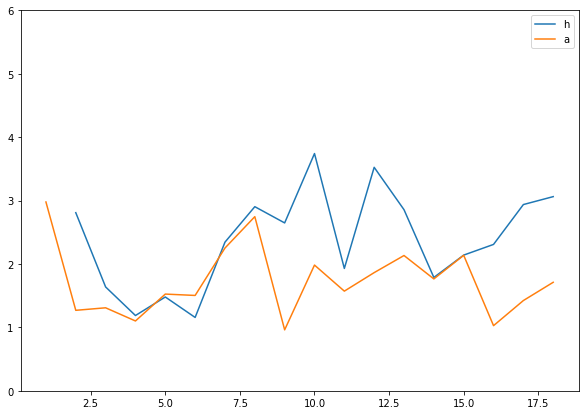

In [54]:
team = 'Chelsea'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


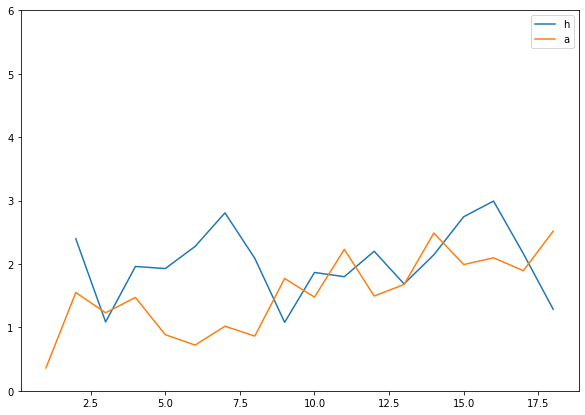

In [55]:
team = 'Tottenham'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


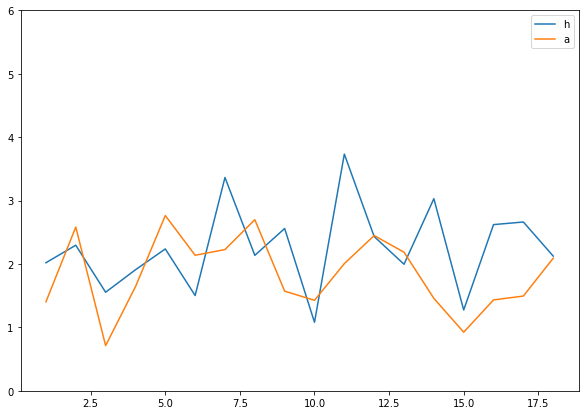

In [56]:
team = 'Man City'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


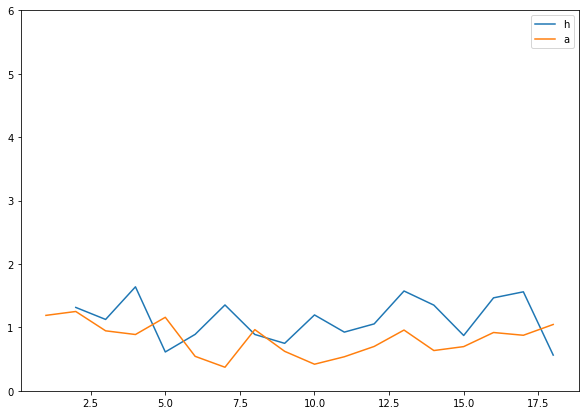

In [57]:
team = 'Hull'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


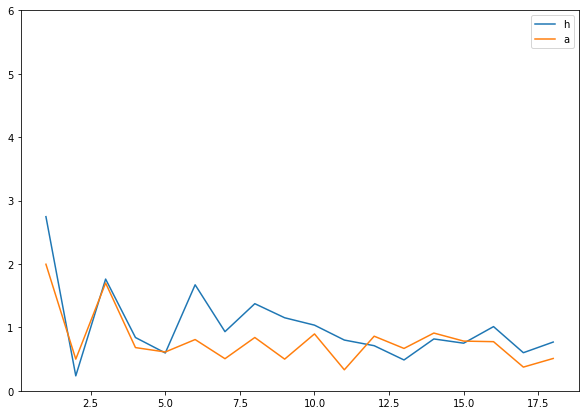

In [58]:
team = 'Middlesbrough'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


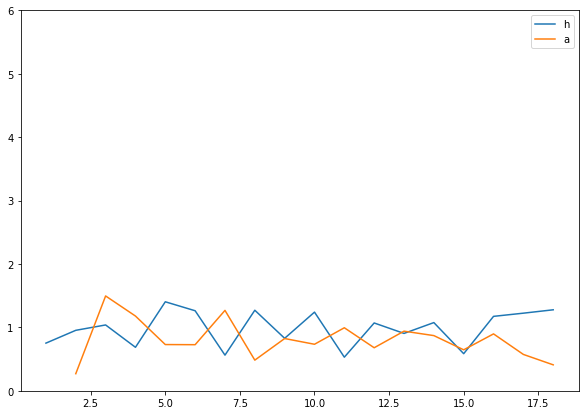

In [59]:
team = 'Sunderland'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();